## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import KFold,GridSearchCV,train_test_split,cross_val_score,cross_val_predict,RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2,f_classif
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
df=pd.read_csv(r'C:\Users\omdes\Desktop\data\teks\All_data_sets\smartphones.csv')

In [5]:
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,5000.0,1,15.0,4.0,64.0,6.60,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,NaN,6.0,128.0,6.55,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,5000.0,1,67.0,6.0,128.0,6.70,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [6]:
df.shape

(980, 26)

In [7]:
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000,980.000000,980.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000,1075.852041,2214.663265
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911,290.164931,516.484254
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000,480.000000,480.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000,1080.000000,1612.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,1080.000000,2400.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000,2460.000000,3840.000000


In [8]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [9]:
df.isnull().sum().sum()

894

In [10]:
df['model'].duplicated().sum()

0

In [11]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

## Data Cleaning

In [12]:
df.loc[df['fast_charging'].isnull() & (df['fast_charging_available'] == 0), 'fast_charging'] = 0

In [13]:
df.loc[df['extended_upto'].isnull() & (df['extended_memory_available'] == 0),'extended_upto']=0

In [14]:
df[df['os'].isnull()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
158,oppo,Oppo Find N2 5G,94990,NaN,True,True,False,snapdragon,8.0,3.20,4520.0,1,67.0,12.0,256.0,7.10,120,3,2.0,NaN,50.0,32.0,0,0.0,1792,1920
304,samsung,Samsung Galaxy Z Flip 3,69999,84.0,True,True,False,snapdragon,8.0,2.84,3300.0,1,15.0,8.0,128.0,6.70,120,2,1.0,NaN,12.0,10.0,0,0.0,1080,2640
320,royole,Royole FlexPai 2,109999,87.0,True,False,False,snapdragon,8.0,2.84,4450.0,0,0.0,8.0,128.0,7.80,60,3,1.0,NaN,64.0,32.0,0,0.0,1440,1920
363,oppo,OPPO Find N Flip,89990,88.0,True,True,False,dimensity,8.0,3.05,4300.0,1,44.0,8.0,128.0,6.80,120,2,1.0,NaN,50.0,32.0,0,0.0,1200,2400
389,oppo,OPPO Find N2 Flip,70990,88.0,True,True,False,dimensity,8.0,3.20,4300.0,1,44.0,8.0,256.0,6.80,120,2,1.0,NaN,50.0,32.0,0,0.0,1080,2520
498,samsung,Samsung Galaxy Z Flip 4 5G,89999,88.0,True,True,False,snapdragon,8.0,3.20,3700.0,1,25.0,8.0,128.0,6.70,120,2,1.0,NaN,12.0,10.0,0,0.0,1080,2640
561,lg,LG Wing 5G,54999,89.0,True,True,False,snapdragon,8.0,2.40,4000.0,1,NaN,8.0,128.0,6.80,60,3,1.0,NaN,64.0,32.0,0,0.0,1080,2460
599,oukitel,Oukitel WP21,22990,82.0,False,False,False,helio,8.0,2.20,9800.0,1,66.0,12.0,256.0,6.78,120,3,1.0,NaN,64.0,NaN,0,0.0,1080,2400
662,lg,LG V60 ThinQ,79990,NaN,True,True,False,snapdragon,8.0,2.84,5000.0,1,NaN,8.0,128.0,6.80,60,3,1.0,NaN,64.0,10.0,0,0.0,1080,2460
699,asus,Asus ROG Phone 6D Ultimate,107990,NaN,True,True,False,dimensity,8.0,3.20,6000.0,1,65.0,16.0,512.0,6.78,165,3,1.0,NaN,50.0,12.0,0,0.0,1080,2448


In [15]:
df['os'].value_counts()

os
android    909
ios         46
other       11
Name: count, dtype: int64

In [16]:
df['os'].fillna(value='android',inplace=True)

In [17]:
df[df['os']=='other']

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
69,oppo,Oppo Find N Fold,99990,NaN,True,True,False,snapdragon,8.0,3.20,5000.0,1,67.0,8.0,256.0,7.10,120,2,NaN,other,50.0,NaN,0,0.0,1792,1920
75,gionee,Gionee G13 Pro,6190,NaN,False,False,False,tiger,4.0,2.00,3500.0,0,0.0,4.0,32.0,6.26,60,2,1.0,other,13.0,5.0,1,NaN,720,1600
478,huawei,Huawei Mate 50 RS Porsche Design,239999,81.0,False,True,True,snapdragon,8.0,3.20,4700.0,1,66.0,12.0,512.0,6.74,120,3,1.0,other,50.0,13.0,1,256.0,1212,2616
631,huawei,Huawei Mate 40 Pro 4G,69990,NaN,False,True,True,kirin,8.0,3.13,4400.0,1,66.0,8.0,128.0,6.76,90,3,2.0,other,50.0,13.0,1,256.0,1344,2772
702,huawei,Huawei Mate 50 Pro 5G,99990,85.0,True,True,False,kirin,8.0,3.13,4500.0,1,66.0,8.0,256.0,6.76,120,3,1.0,other,64.0,13.0,0,0.0,1440,3200
712,huawei,Huawei Nova 9,29990,83.0,False,True,False,snapdragon,8.0,2.40,4300.0,1,66.0,8.0,128.0,6.57,120,4,1.0,other,50.0,32.0,0,0.0,1080,2340
714,huawei,Huawei P50 Pro 4G,60999,NaN,False,True,True,snapdragon,8.0,2.84,4360.0,1,66.0,8.0,256.0,6.60,120,4,1.0,other,50.0,13.0,1,256.0,1288,2700
844,huawei,Huawei Nova Y61,21990,63.0,False,False,False,NaN,8.0,NaN,5000.0,1,22.0,4.0,64.0,6.52,60,3,1.0,other,50.0,5.0,1,NaN,720,1600
851,huawei,Huawei Nova 10,29990,82.0,False,False,False,snapdragon,8.0,2.40,4000.0,1,66.0,8.0,128.0,6.67,120,3,1.0,other,50.0,60.0,0,0.0,1080,2400
852,huawei,Huawei Nova Y90,22990,82.0,False,True,False,snapdragon,8.0,2.40,5000.0,1,40.0,8.0,128.0,6.70,90,4,1.0,other,50.0,8.0,1,NaN,1080,2388


In [18]:
df[df['num_front_cameras'].isnull()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
69,oppo,Oppo Find N Fold,99990,NaN,True,True,False,snapdragon,8.0,3.20,5000.0,1,67.0,8.0,256.0,7.10,120,2,NaN,other,50.0,NaN,0,0.0,1792,1920
458,xiaomi,Xiaomi Mi Mix Alpha,199990,NaN,True,False,False,snapdragon,8.0,2.96,4050.0,1,40.0,12.0,512.0,7.92,60,3,NaN,android,108.0,NaN,0,0.0,2088,2250
954,huawei,Huawei Mate X,169000,NaN,True,True,True,kirin,8.0,2.86,4500.0,1,55.0,8.0,512.0,8.00,60,4,NaN,android,48.0,NaN,0,0.0,2200,2480
972,itel,itel A23s,4787,NaN,False,False,False,spreadtrum,4.0,1.40,3020.0,0,0.0,2.0,32.0,5.00,60,1,NaN,android,2.0,NaN,0,0.0,854,480


In [19]:
df['num_front_cameras'].value_counts()

num_front_cameras
1.0    947
2.0     29
Name: count, dtype: int64

In [20]:
df[df['primary_camera_front'].isnull()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
69,oppo,Oppo Find N Fold,99990,NaN,True,True,False,snapdragon,8.0,3.20,5000.0,1,67.0,8.0,256.0,7.10,120,2,NaN,other,50.0,NaN,0,0.0,1792,1920
458,xiaomi,Xiaomi Mi Mix Alpha,199990,NaN,True,False,False,snapdragon,8.0,2.96,4050.0,1,40.0,12.0,512.0,7.92,60,3,NaN,android,108.0,NaN,0,0.0,2088,2250
599,oukitel,Oukitel WP21,22990,82.0,False,False,False,helio,8.0,2.20,9800.0,1,66.0,12.0,256.0,6.78,120,3,1.0,android,64.0,NaN,0,0.0,1080,2400
954,huawei,Huawei Mate X,169000,NaN,True,True,True,kirin,8.0,2.86,4500.0,1,55.0,8.0,512.0,8.00,60,4,NaN,android,48.0,NaN,0,0.0,2200,2480
972,itel,itel A23s,4787,NaN,False,False,False,spreadtrum,4.0,1.40,3020.0,0,0.0,2.0,32.0,5.00,60,1,NaN,android,2.0,NaN,0,0.0,854,480


In [21]:
df.dropna(subset=['num_front_cameras','primary_camera_front'],inplace=True)

In [22]:
df[df['rating'].isnull()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
14,samsung,Samsung Galaxy S23 Ultra 5G,114990,NaN,True,True,False,snapdragon,8.0,3.20,5000.0,1,45.0,8.0,256.0,6.80,120,4,1.0,android,200.0,12.0,0,0.0,1440,3088
29,oneplus,OnePlus 11 Pro,69999,NaN,True,True,False,snapdragon,8.0,3.20,4500.0,1,100.0,8.0,128.0,6.70,120,3,1.0,android,50.0,16.0,0,0.0,1440,3216
37,samsung,Samsung Galaxy S22 Ultra 5G,91999,NaN,True,True,False,snapdragon,8.0,3.00,5000.0,1,45.0,12.0,256.0,6.80,120,4,1.0,android,108.0,40.0,0,0.0,1440,3080
49,samsung,Samsung Galaxy A74 5G,42999,NaN,True,True,False,snapdragon,8.0,2.36,5000.0,1,33.0,8.0,128.0,6.70,120,4,1.0,android,108.0,32.0,1,1024.0,1080,2412
75,gionee,Gionee G13 Pro,6190,NaN,False,False,False,tiger,4.0,2.00,3500.0,0,0.0,4.0,32.0,6.26,60,2,1.0,other,13.0,5.0,1,NaN,720,1600
89,samsung,Samsung Galaxy A73 5G,41999,NaN,True,True,False,snapdragon,8.0,2.40,5000.0,1,25.0,8.0,128.0,6.70,120,4,1.0,android,108.0,32.0,1,1024.0,1080,2400
93,vivo,Vivo X90 Pro Plus 5G,73999,NaN,True,True,True,snapdragon,8.0,3.20,4700.0,1,80.0,12.0,256.0,6.78,120,4,1.0,android,50.3,32.0,0,0.0,1440,3200
98,vivo,Vivo X Fold 5G,106990,NaN,True,True,False,snapdragon,8.0,3.00,4600.0,1,66.0,12.0,256.0,8.03,120,4,1.0,android,50.0,16.0,0,0.0,1916,2160
105,xiaomi,Xiaomi 13 Pro 5G,58990,NaN,True,True,True,snapdragon,8.0,3.20,4820.0,1,120.0,8.0,128.0,6.73,120,3,1.0,android,50.3,32.0,0,0.0,1440,3200
114,xiaomi,Xiaomi Redmi A1,6171,NaN,False,False,False,helio,4.0,2.00,5000.0,1,10.0,2.0,32.0,6.52,60,2,1.0,android,8.0,5.0,1,512.0,720,1600


In [23]:
df[df['processor_brand'].isnull()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
118,tesla,Tesla Pi Phone,69999,83.0,True,True,False,NaN,8.0,NaN,5000.0,1,120.0,16.0,512.0,6.73,165,3,1.0,android,50.0,32.0,0,0.0,1080,2448
143,jio,Jio Phone 3,4499,NaN,False,False,False,NaN,4.0,1.4,2800.0,0,0.0,2.0,64.0,5.00,60,1,1.0,android,5.0,2.0,1,128.0,720,1280
187,ikall,iKall Z19 Pro,8099,60.0,False,False,False,NaN,4.0,1.6,5000.0,0,0.0,4.0,64.0,6.50,60,1,1.0,android,13.0,8.0,1,128.0,720,1600
200,samsung,Samsung Galaxy A13,14450,75.0,False,False,False,NaN,8.0,2.0,5000.0,1,25.0,4.0,64.0,6.60,60,4,1.0,android,50.0,8.0,1,1024.0,1080,2408
307,samsung,Samsung Galaxy A13 (4GB RAM + 128GB),14999,75.0,False,False,False,NaN,8.0,2.0,5000.0,1,25.0,4.0,128.0,6.60,60,4,1.0,android,50.0,8.0,1,1024.0,1080,2408
313,itel,itel S16 Pro,6990,NaN,False,False,False,NaN,4.0,1.3,4000.0,0,0.0,2.0,32.0,6.60,60,3,1.0,android,8.0,8.0,1,32.0,1600,720
490,samsung,Samsung Galaxy A15,15990,63.0,False,False,False,NaN,8.0,NaN,5000.0,1,NaN,6.0,64.0,6.50,60,3,1.0,android,48.0,8.0,1,1024.0,720,1600
523,samsung,Samsung Galaxy F14,14990,67.0,False,True,False,NaN,8.0,NaN,5000.0,1,25.0,4.0,64.0,6.62,60,3,1.0,android,50.0,16.0,1,1024.0,2408,1080
575,samsung,Samsung Galaxy A13 (6GB RAM + 128GB),16499,78.0,False,False,False,NaN,8.0,2.0,5000.0,1,25.0,6.0,128.0,6.60,60,4,1.0,android,50.0,8.0,1,1024.0,1080,2408
733,ikall,iKall Z19,7999,61.0,False,False,False,NaN,4.0,1.6,5000.0,0,0.0,4.0,32.0,6.50,60,1,1.0,android,20.0,13.0,1,128.0,720,1600


In [24]:
df['processor_brand'].value_counts()

processor_brand
snapdragon    411
helio         200
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           6
spreadtrum      3
sc9863a         2
fusion          1
mediatek        1
Name: count, dtype: int64

In [25]:
def assign_processor_brand(row):
    if row['model'] == 'jio':
        return 'spreadtrum'
    elif row['model'] == 'itel':
        return 'unisoc'
    elif row['model'] == 'Samsung':
        return 'exynos'
    else:
        return 'snapdragon'
df.loc[df['processor_brand'].isnull(), 'processor_brand'] = df.loc[df['processor_brand'].isnull()].apply(assign_processor_brand, axis=1)

In [26]:
df[df['num_cores'].isnull()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
152,apple,Apple iPhone 15 Pro Max,142990,79.0,True,True,False,bionic,NaN,NaN,4352.0,1,25.0,8.0,256.0,6.68,120,3,1.0,ios,50.0,12.0,0,0.0,1284,2778
262,apple,Apple iPhone XR2,71999,60.0,False,True,False,bionic,NaN,NaN,3060.0,1,NaN,4.0,64.0,6.10,60,2,1.0,ios,12.0,7.0,0,0.0,828,1792
280,apple,Apple iPhone 14 Mini,69990,70.0,False,True,False,bionic,NaN,NaN,3500.0,1,NaN,6.0,128.0,5.42,60,2,1.0,ios,12.0,12.0,0,0.0,1080,2340
425,nokia,Nokia X50 5G,34999,76.0,True,False,False,snapdragon,NaN,NaN,6000.0,1,33.0,6.0,64.0,6.81,60,4,1.0,android,108.0,32.0,1,NaN,1080,2400
444,apple,Apple iPhone 15 Pro,130990,75.0,True,True,False,bionic,NaN,NaN,NaN,0,0.0,8.0,128.0,6.06,120,3,1.0,ios,50.0,12.0,0,0.0,1170,2532
706,apple,Apple iPhone 15,82990,72.0,False,True,False,bionic,NaN,NaN,3285.0,1,NaN,6.0,128.0,6.06,60,2,1.0,ios,50.0,13.0,0,0.0,1170,2532


In [27]:
df['num_cores'].value_counts()

num_cores
8.0    895
6.0     39
4.0     35
Name: count, dtype: int64

In [28]:
df['processor_speed'].value_counts()

processor_speed
2.00    146
2.20    134
2.40    128
3.20     93
2.30     86
3.00     53
2.84     36
2.05     28
2.50     23
1.80     23
1.60     20
2.85     19
3.22     18
3.10     15
2.60     14
2.90     13
1.30     10
1.82     10
2.73      9
2.80      9
3.05      8
2.36      8
2.65      5
2.70      5
1.40      4
1.50      4
2.96      2
3.13      2
2.86      2
2.35      1
2.37      1
1.99      1
1.95      1
2.10      1
1.20      1
Name: count, dtype: int64

In [29]:
df[df['battery_capacity'].isnull()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
111,apple,Apple iPhone 12,51999,74.0,True,True,False,bionic,6.0,3.10,NaN,0,0.0,4.0,64.0,6.10,60,2,1.0,ios,12.0,12.0,0,0.0,1170,2532
149,apple,Apple iPhone 12 Mini,40999,74.0,True,True,False,bionic,6.0,3.10,NaN,0,0.0,4.0,64.0,5.40,60,2,1.0,ios,12.0,12.0,0,0.0,1080,2340
305,apple,Apple iPhone 12 (128GB),55999,75.0,True,True,False,bionic,6.0,3.10,NaN,0,0.0,4.0,128.0,6.10,60,2,1.0,ios,12.0,12.0,0,0.0,1170,2532
361,apple,Apple iPhone 12 Mini (128GB),45999,75.0,True,True,False,bionic,6.0,3.10,NaN,0,0.0,4.0,128.0,5.40,60,2,1.0,ios,12.0,12.0,0,0.0,1080,2340
435,apple,Apple iPhone SE 3 2022,43900,NaN,True,True,False,bionic,6.0,3.22,NaN,0,0.0,4.0,64.0,4.70,60,1,1.0,ios,12.0,7.0,0,0.0,750,1334
444,apple,Apple iPhone 15 Pro,130990,75.0,True,True,False,bionic,NaN,NaN,NaN,0,0.0,8.0,128.0,6.06,120,3,1.0,ios,50.0,12.0,0,0.0,1170,2532
613,apple,Apple iPhone 12 Pro (512GB),139900,80.0,True,True,False,bionic,6.0,3.10,NaN,0,0.0,6.0,512.0,6.10,60,3,1.0,ios,12.0,12.0,0,0.0,1170,2532
737,apple,Apple iPhone SE 4,49990,60.0,True,True,False,bionic,6.0,3.22,NaN,0,0.0,4.0,64.0,6.10,60,1,1.0,ios,12.0,10.8,0,0.0,750,1580
824,apple,Apple iPhone 12 Pro (256GB),119900,80.0,True,True,False,bionic,6.0,3.10,NaN,0,0.0,6.0,256.0,6.10,60,3,1.0,ios,12.0,12.0,0,0.0,1170,2532
880,apple,Apple iPhone 12 Mini (256GB),55999,75.0,True,True,False,bionic,6.0,3.10,NaN,0,0.0,4.0,256.0,5.40,60,2,1.0,ios,12.0,12.0,0,0.0,1080,2340


In [30]:
df['battery_capacity'].fillna(value=3274 ,inplace=True)

In [31]:
df['extended_upto'].value_counts()

extended_upto
0.0       357
1024.0    263
512.0     116
256.0     100
128.0       9
2048.0      6
32.0        3
64.0        3
Name: count, dtype: int64

In [32]:
df[df['extended_upto'].isnull()]

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
11,oppo,Oppo A78,18999,79.0,True,True,False,dimensity,8.0,2.20,5000.0,1,33.0,8.0,128.0,6.56,90,2,1.0,android,50.0,8.0,1,NaN,720,1612
16,vivo,Vivo Y16,9999,65.0,False,False,False,helio,8.0,2.30,5000.0,1,10.0,3.0,32.0,6.51,60,2,1.0,android,13.0,5.0,1,NaN,720,1600
25,samsung,Samsung Galaxy S20 FE 5G,31239,88.0,True,True,False,snapdragon,8.0,2.84,4500.0,1,NaN,8.0,128.0,6.50,120,3,1.0,android,12.0,32.0,1,NaN,1080,2400
32,vivo,Vivo V27,27990,83.0,True,False,False,dimensity,8.0,2.20,4700.0,1,67.0,8.0,256.0,6.56,120,3,1.0,android,64.0,50.0,1,NaN,1080,2400
48,vivo,Vivo Y16 (4GB RAM + 64GB),12489,68.0,False,False,False,helio,8.0,2.30,5000.0,1,10.0,4.0,64.0,6.51,60,2,1.0,android,13.0,5.0,1,NaN,720,1600
71,vivo,Vivo V23 5G (12GB RAM + 256GB),27994,86.0,True,False,False,dimensity,8.0,2.50,4200.0,1,44.0,12.0,256.0,6.44,90,3,2.0,android,64.0,50.0,1,NaN,1080,2400
75,gionee,Gionee G13 Pro,6190,NaN,False,False,False,tiger,4.0,2.00,3500.0,0,0.0,4.0,32.0,6.26,60,2,1.0,other,13.0,5.0,1,NaN,720,1600
80,motorola,Motorola Moto G72 4G,15999,83.0,False,True,False,helio,8.0,2.20,5000.0,1,33.0,6.0,128.0,6.55,120,3,1.0,android,108.0,16.0,1,NaN,1080,2400
144,oneplus,OnePlus Clover,14999,69.0,False,False,False,snapdragon,8.0,1.80,6000.0,1,18.0,4.0,64.0,6.52,60,3,1.0,android,13.0,8.0,1,NaN,720,1560
147,samsung,Samsung Galaxy M34 5G,16999,84.0,True,True,False,exynos,8.0,2.40,6000.0,1,25.0,6.0,128.0,6.50,120,4,1.0,android,64.0,32.0,1,NaN,1080,2400


In [33]:
df['extended_upto'].fillna(value=1024.0,inplace=True)

In [34]:
fillna_mean=['rating','processor_speed','fast_charging']
fillna_mode=['num_cores']

In [35]:
for i in fillna_mean:
    df[i].fillna(df[i].mean(),inplace=True)
for i in fillna_mode:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [36]:
df.isnull().sum().sum()

0

In [37]:
df['resolution'] = df['resolution_width'] * df['resolution_height']

In [38]:
df=df[df['price']<=200000]
df=df[df['battery_capacity']<10000]

rating = mean

num_cores = mode

processor_speed =mean

fast_charging=mean




if model = jio then processor_brand=Spreadtrum

itel =Unisoc

Samsung =exynos 

## Data Visualization

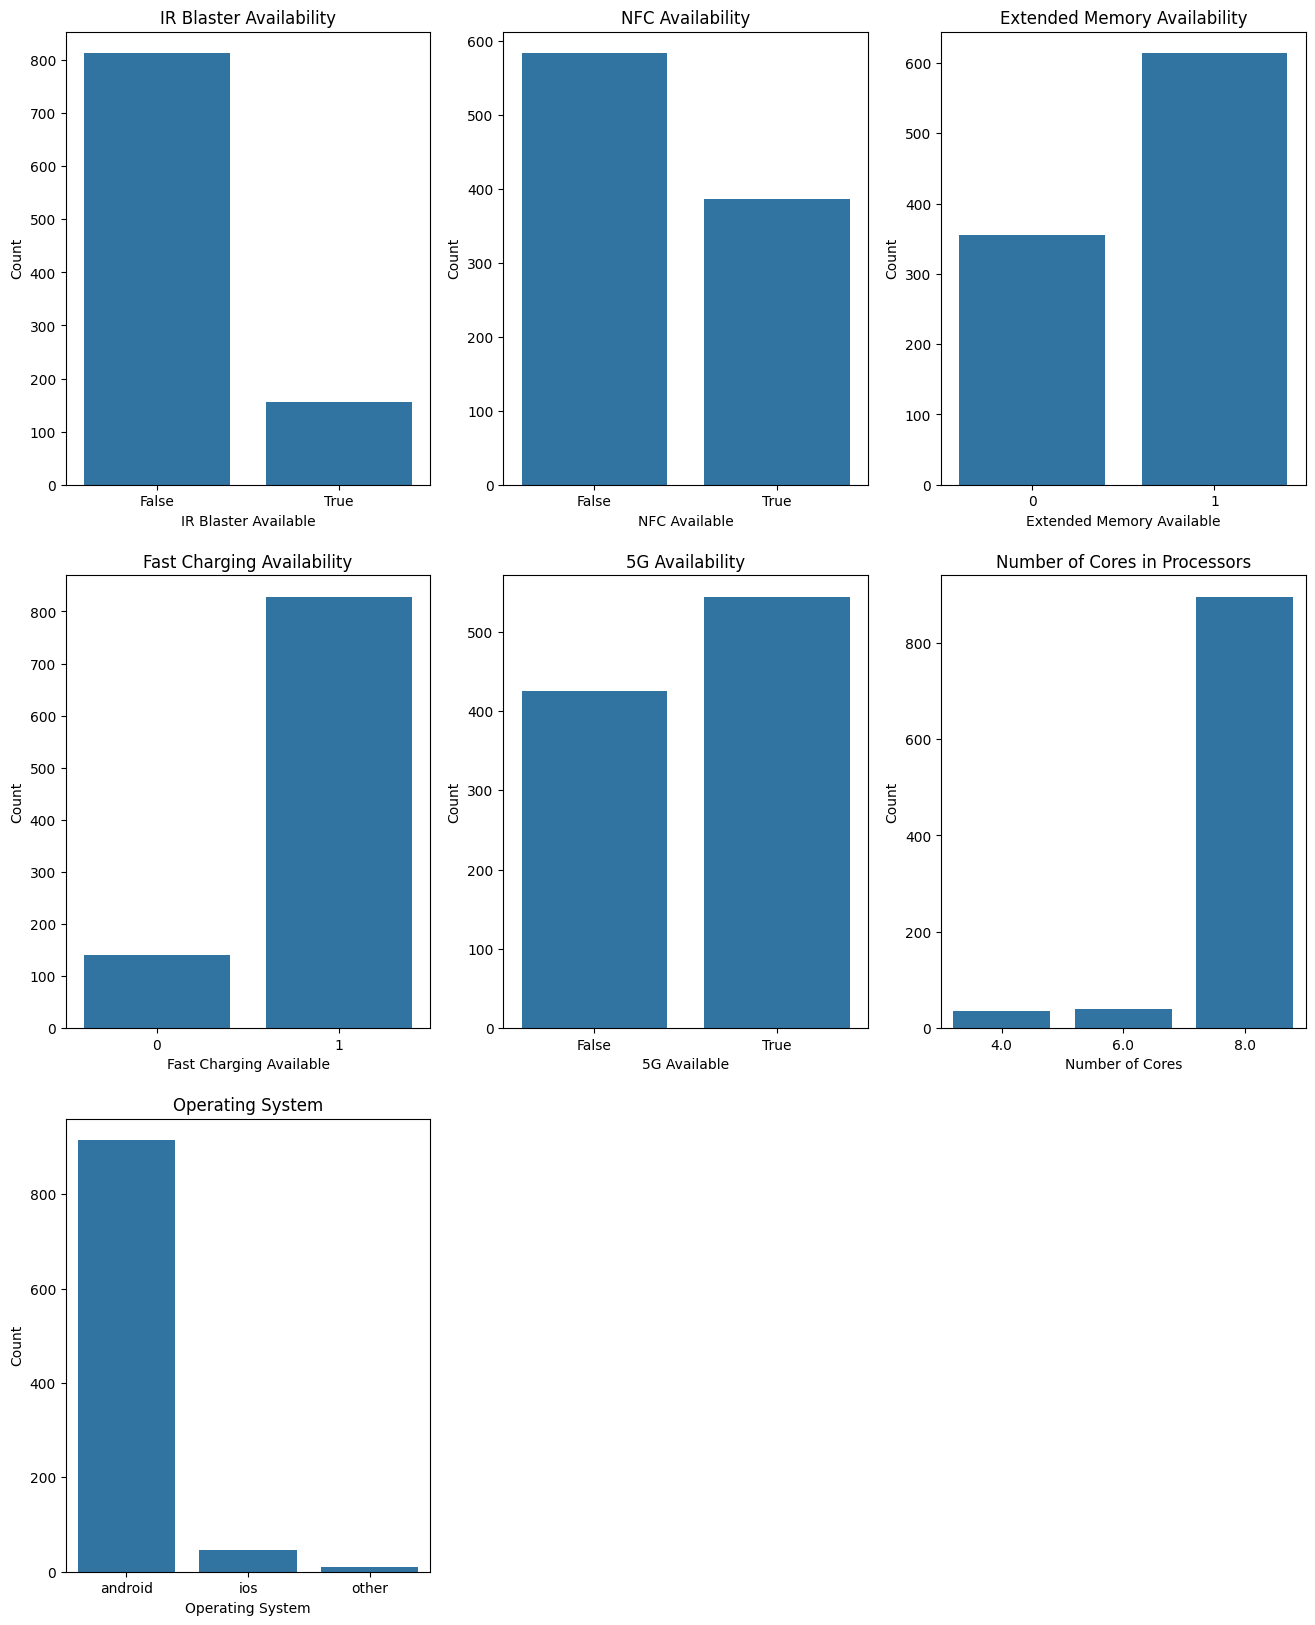

In [39]:
plt.figure(figsize=(16, 20))

plt.subplot(3,3,1) 
sns.countplot(x='has_ir_blaster', data=df)
plt.title('IR Blaster Availability')
plt.xlabel('IR Blaster Available')
plt.ylabel('Count')


plt.subplot(3,3,2)
sns.countplot(x='has_nfc', data=df)
plt.title('NFC Availability')
plt.xlabel('NFC Available')
plt.ylabel('Count')

plt.subplot(3,3,3)
sns.countplot(x='extended_memory_available', data=df)
plt.title('Extended Memory Availability')
plt.xlabel('Extended Memory Available')
plt.ylabel('Count')

plt.subplot(3,3,4)
sns.countplot(x='fast_charging_available', data=df)
plt.title('Fast Charging Availability')
plt.xlabel('Fast Charging Available')
plt.ylabel('Count')


plt.subplot(3,3,5)
sns.countplot(x='has_5g', data=df)
plt.title('5G Availability')
plt.xlabel('5G Available')
plt.ylabel('Count')

plt.subplot(3,3,6)
sns.countplot(x='num_cores', data=df)
plt.title('Number of Cores in Processors')
plt.xlabel('Number of Cores')
plt.ylabel('Count')

plt.subplot(3,3,7)
sns.countplot(x='os', data=df)
plt.title('Operating System' )
plt.ylabel('Count')
plt.xlabel('Operating System')
plt.show()

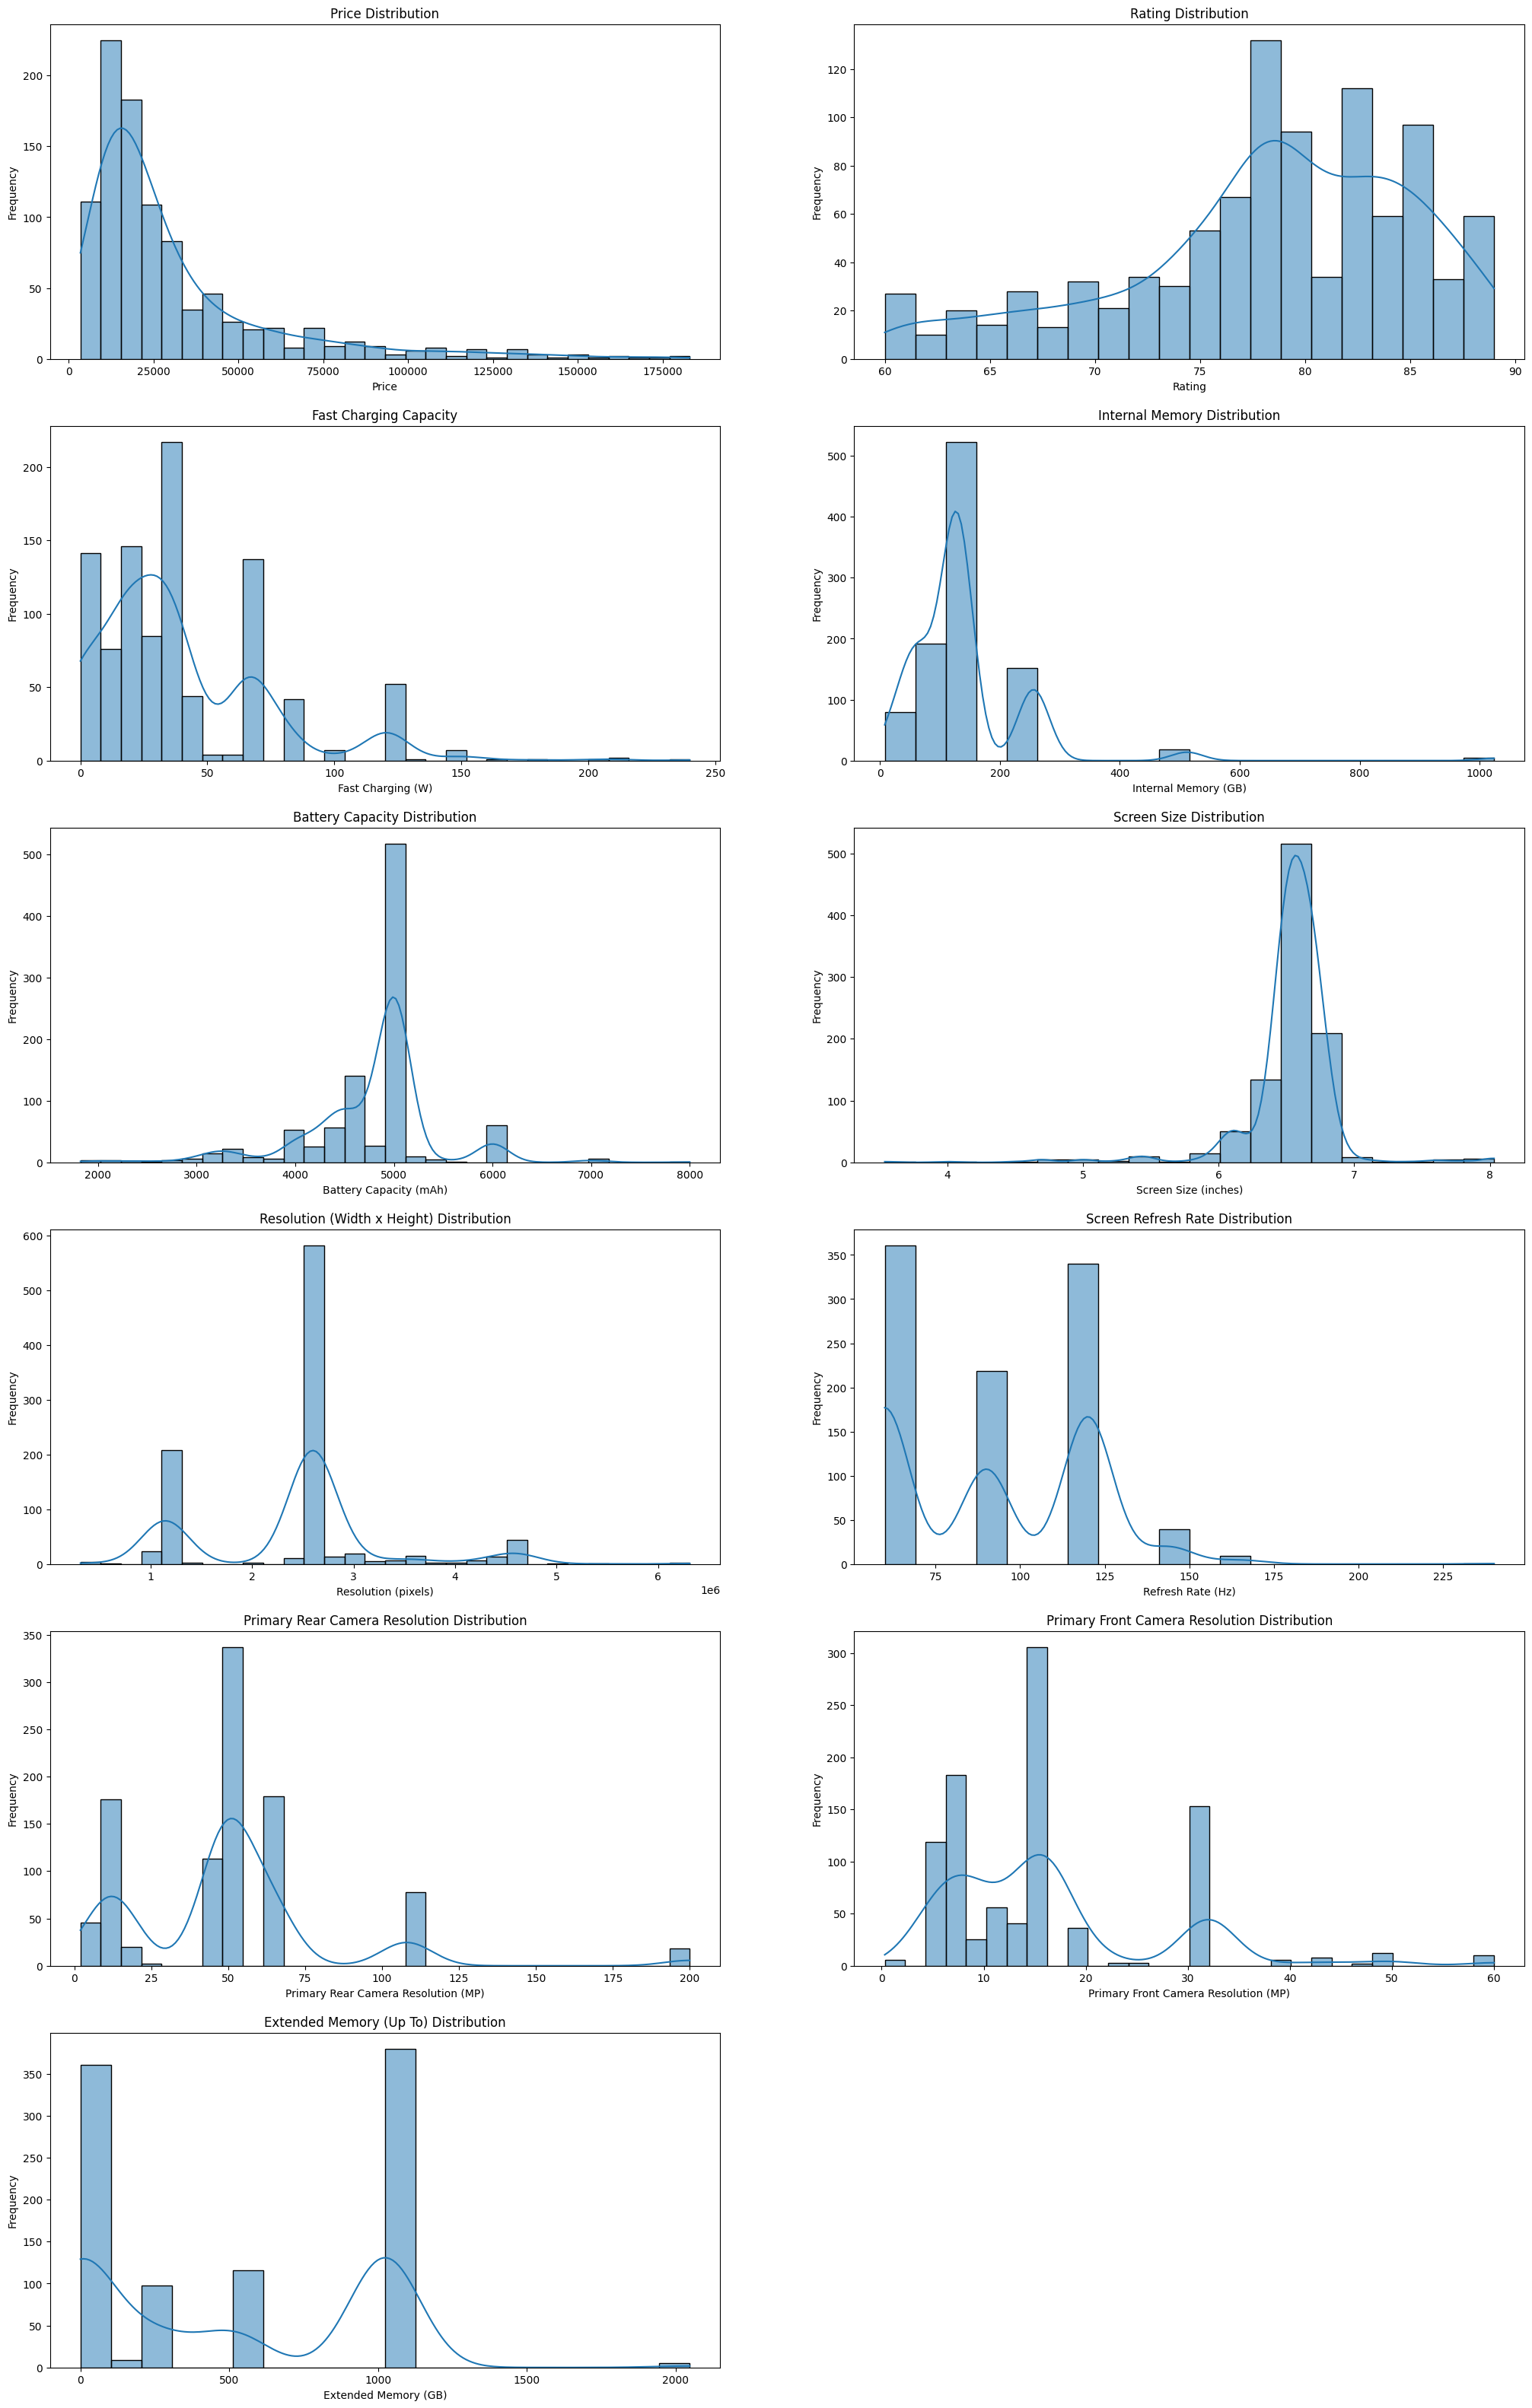

In [40]:
plt.figure(figsize=(25, 40))


plt.subplot(6,2,1)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')


plt.subplot(6,2,2)
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(6,2,3)
sns.histplot(df['fast_charging'], bins=30, kde=True)
plt.title('Fast Charging Capacity')
plt.xlabel('Fast Charging (W)')
plt.ylabel('Frequency')

plt.subplot(6,2,4)
sns.histplot(df['internal_memory'], bins=20, kde=True)
plt.title('Internal Memory Distribution')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Frequency')

plt.subplot(6,2,5)
sns.histplot(df['battery_capacity'], bins=30, kde=True)
plt.title('Battery Capacity Distribution')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Frequency')

plt.subplot(6,2,6)
sns.histplot(df['screen_size'], bins=20, kde=True)
plt.title('Screen Size Distribution')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Frequency')

plt.subplot(6,2,7)
sns.histplot(df['resolution'], bins=30, kde=True)
plt.title('Resolution (Width x Height) Distribution')
plt.xlabel('Resolution (pixels)')
plt.ylabel('Frequency')

plt.subplot(6,2,8)
sns.histplot(df['refresh_rate'], bins=20, kde=True)
plt.title('Screen Refresh Rate Distribution')
plt.xlabel('Refresh Rate (Hz)')
plt.ylabel('Frequency')

plt.subplot(6,2,9)
sns.histplot(df['primary_camera_rear'], bins=30, kde=True)
plt.title('Primary Rear Camera Resolution Distribution')
plt.xlabel('Primary Rear Camera Resolution (MP)')
plt.ylabel('Frequency')

plt.subplot(6,2,10)
sns.histplot(df['primary_camera_front'], bins=30, kde=True)
plt.title('Primary Front Camera Resolution Distribution')
plt.xlabel('Primary Front Camera Resolution (MP)')
plt.ylabel('Frequency')

plt.subplot(6,2,11)
sns.histplot(df['extended_upto'], bins=20, kde=True)
plt.title('Extended Memory (Up To) Distribution')
plt.xlabel('Extended Memory (GB)')
plt.ylabel('Frequency')

plt.show()

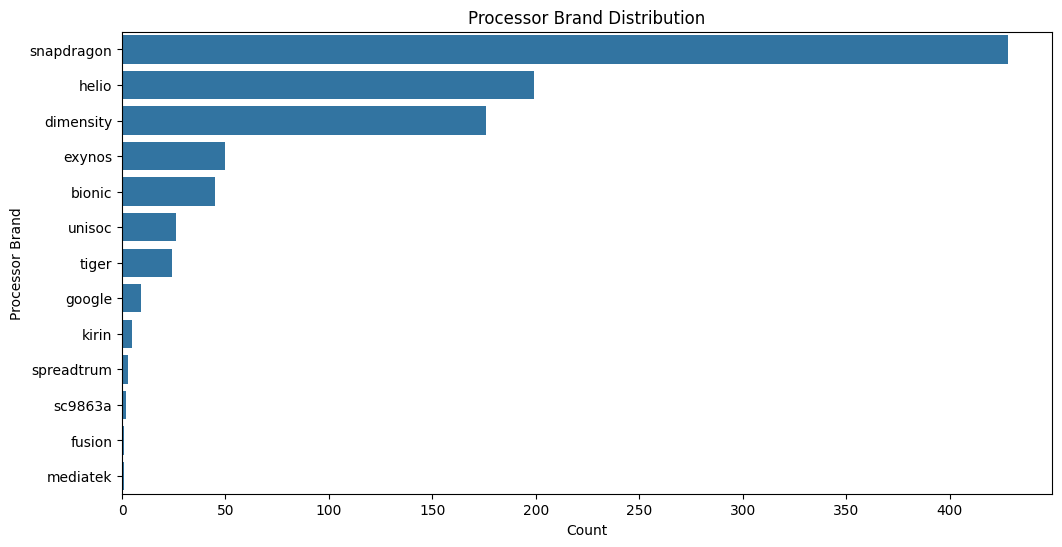

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(y='processor_brand', data=df, order=df['processor_brand'].value_counts().index)
plt.title('Processor Brand Distribution')
plt.xlabel('Count')
plt.ylabel('Processor Brand')
plt.show()

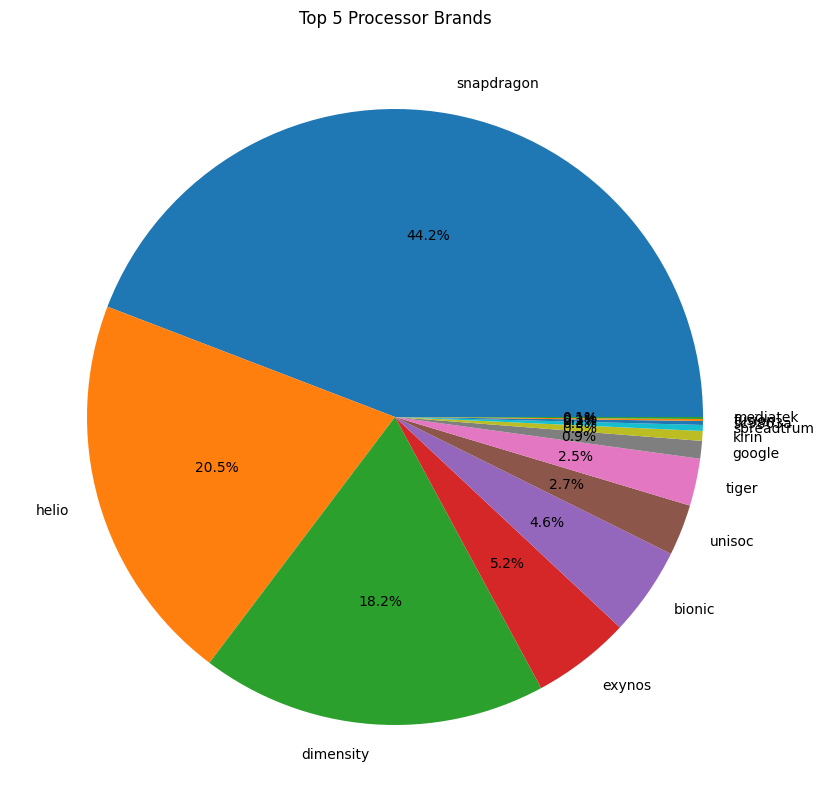

In [42]:
top_brands = df['processor_brand'].value_counts()
plt.figure(figsize=(10,10))
top_brands.plot.pie(autopct='%1.1f%%')
plt.title('Top 5 Processor Brands')
plt.ylabel('')
plt.show()

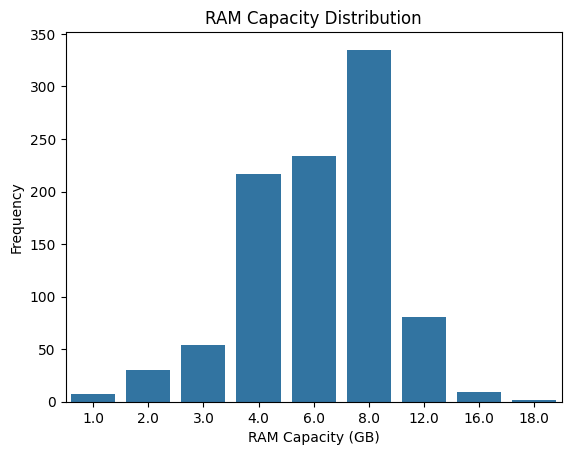

In [43]:
sns.countplot(x='ram_capacity',data=df)
plt.title('RAM Capacity Distribution')
plt.xlabel('RAM Capacity (GB)')
plt.ylabel('Frequency')
plt.show()

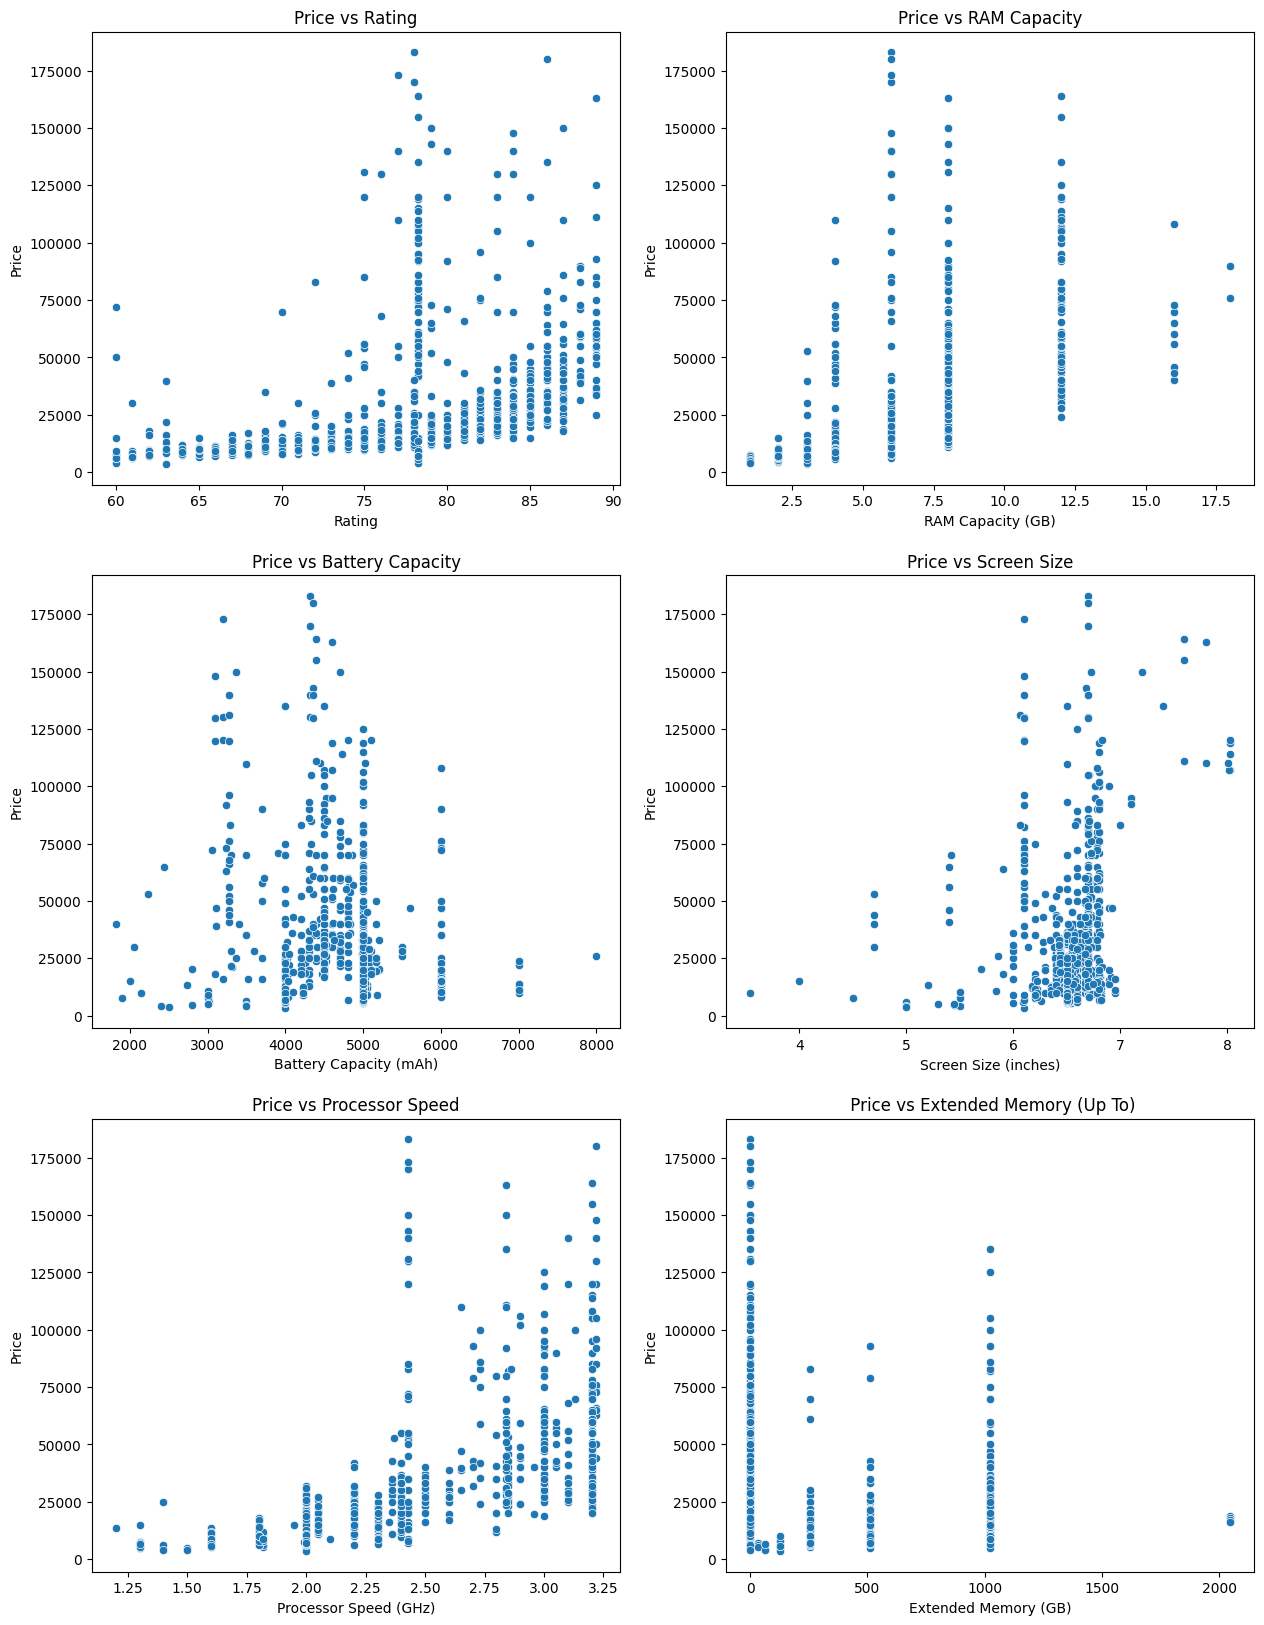

In [44]:
plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
sns.scatterplot(y='price', x='rating', data=df)
plt.title('Price vs Rating')
plt.ylabel('Price')
plt.xlabel('Rating')


plt.subplot(3,2,2)
sns.scatterplot(y='price', x='ram_capacity', data=df)
plt.title('Price vs RAM Capacity')
plt.ylabel('Price')
plt.xlabel('RAM Capacity (GB)')


plt.subplot(3,2,3)
sns.scatterplot(y='price', x='battery_capacity', data=df)
plt.title('Price vs Battery Capacity')
plt.ylabel('Price')
plt.xlabel('Battery Capacity (mAh)')


plt.subplot(3,2,4)
sns.scatterplot(y='price', x='screen_size', data=df)
plt.title('Price vs Screen Size')
plt.ylabel('Price')
plt.xlabel('Screen Size (inches)')


plt.subplot(3,2,5)
sns.scatterplot(y='price', x='processor_speed', data=df)
plt.title('Price vs Processor Speed')
plt.ylabel('Price')
plt.xlabel('Processor Speed (GHz)')

plt.subplot(3,2,6)
sns.scatterplot(x='extended_upto', y='price', data=df)
plt.title(' Price vs Extended Memory (Up To)')
plt.xlabel('Extended Memory (GB)')
plt.ylabel('Price')

plt.show()

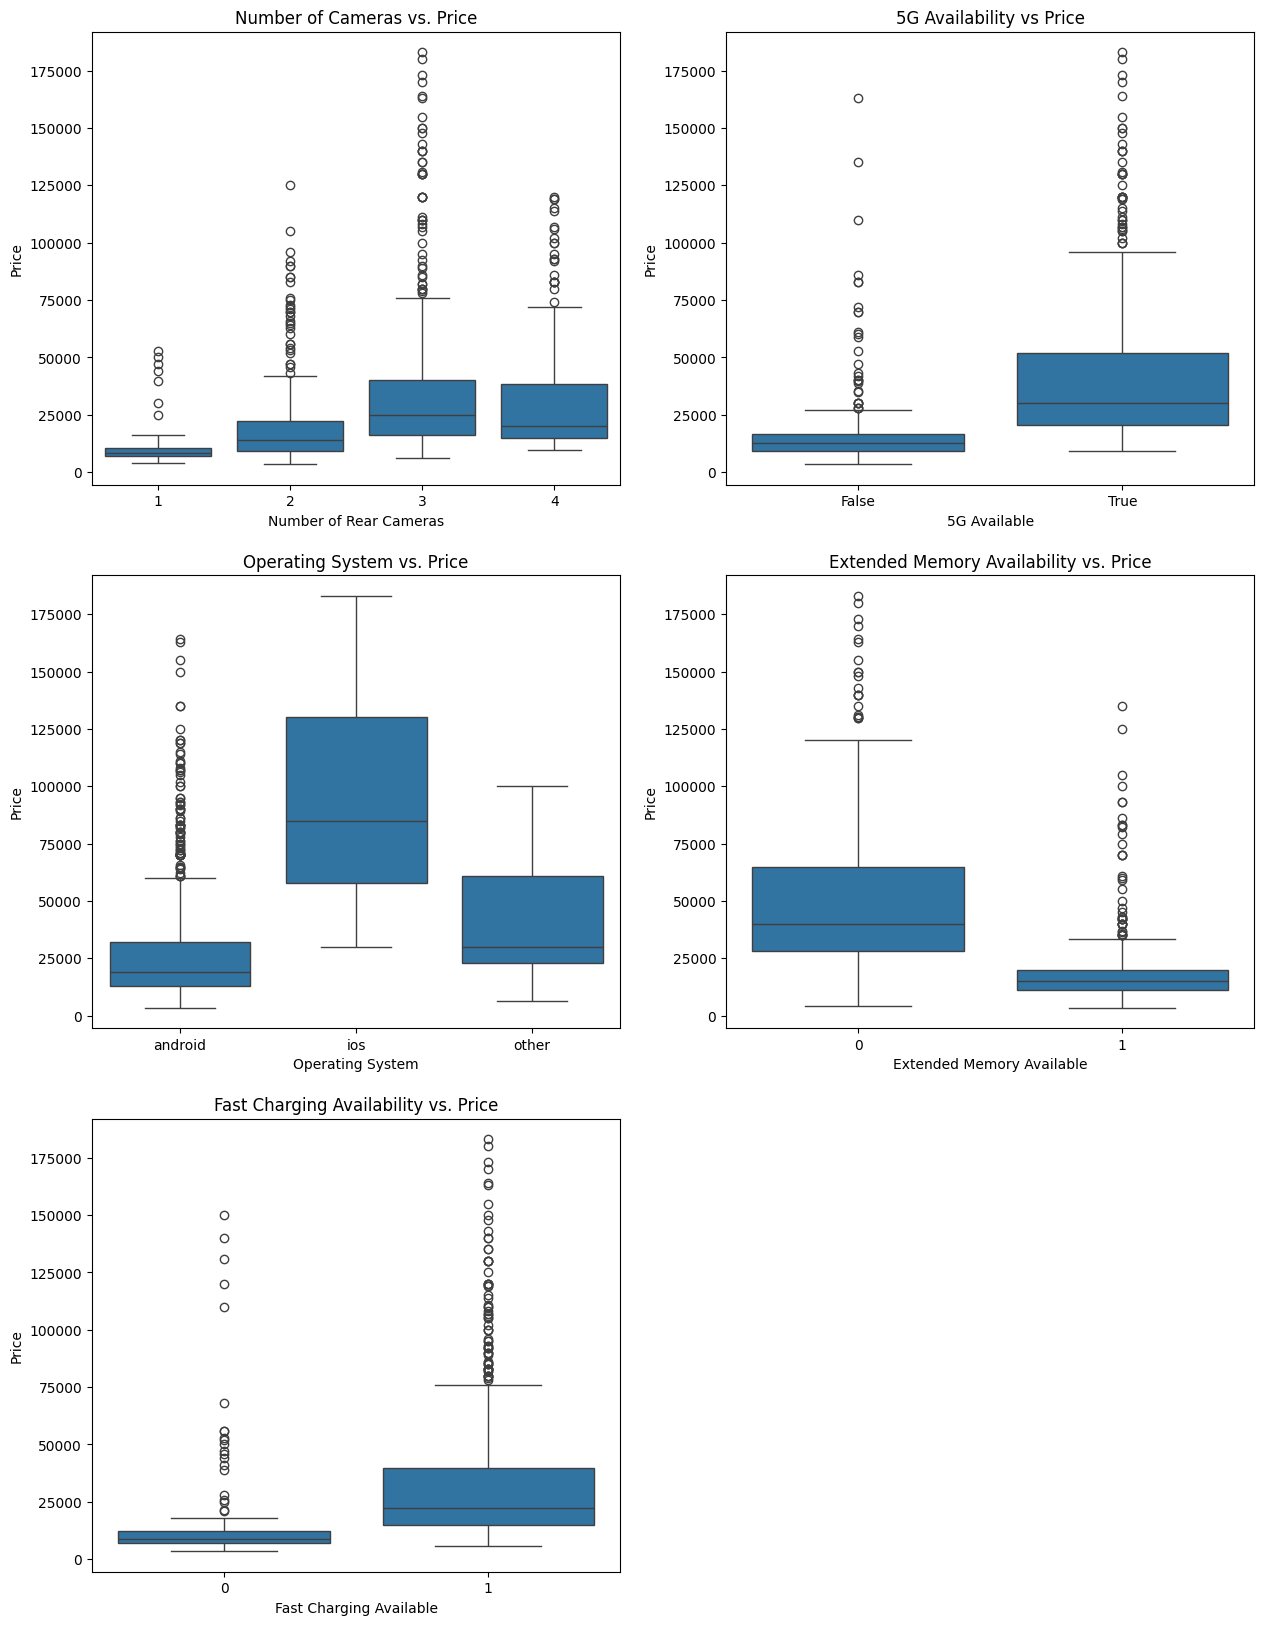

In [45]:
plt.figure(figsize=(15,20))


plt.subplot(3,2,1)
sns.boxplot(x='num_rear_cameras', y='price', data=df)
plt.title('Number of Cameras vs. Price')
plt.xlabel('Number of Rear Cameras')
plt.ylabel('Price')

plt.subplot(3,2,2)
sns.boxplot(x='has_5g', y='price', data=df)
plt.title('5G Availability vs Price')
plt.xlabel('5G Available')
plt.ylabel('Price')

plt.subplot(3,2,3)
sns.boxplot(x='os', y='price', data=df)
plt.title('Operating System vs. Price')
plt.xlabel('Operating System')
plt.ylabel('Price')

plt.subplot(3,2,4)
sns.boxplot(x='extended_memory_available', y='price', data=df)
plt.title('Extended Memory Availability vs. Price')
plt.xlabel('Extended Memory Available')
plt.ylabel('Price')

plt.subplot(3,2,5)
sns.boxplot(x='fast_charging_available', y='price', data=df)
plt.title('Fast Charging Availability vs. Price')
plt.xlabel('Fast Charging Available')
plt.ylabel('Price')


plt.show()

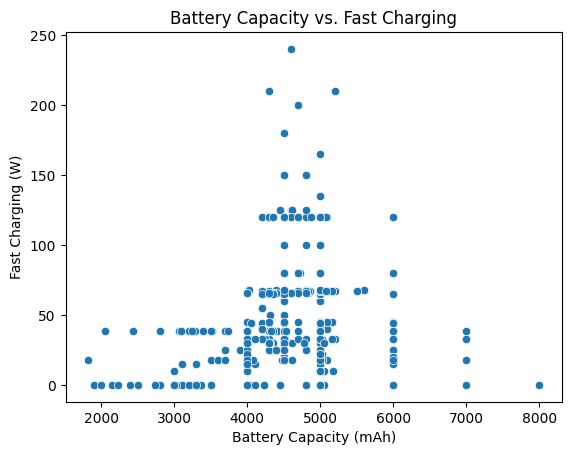

In [46]:
sns.scatterplot(x='battery_capacity', y='fast_charging', data=df)
plt.title('Battery Capacity vs. Fast Charging')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Fast Charging (W)')
plt.show()

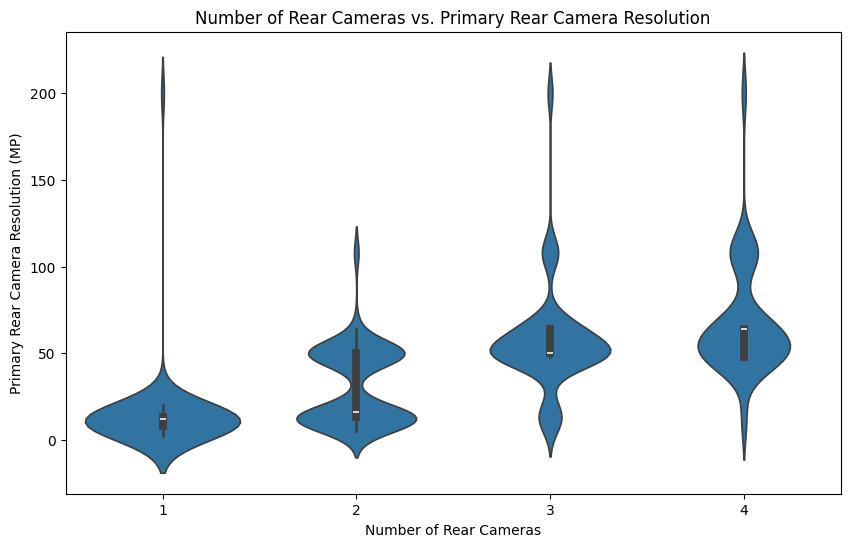

In [47]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='num_rear_cameras', y='primary_camera_rear', data=df)
plt.title('Number of Rear Cameras vs. Primary Rear Camera Resolution')
plt.xlabel('Number of Rear Cameras')
plt.ylabel('Primary Rear Camera Resolution (MP)')
plt.show()

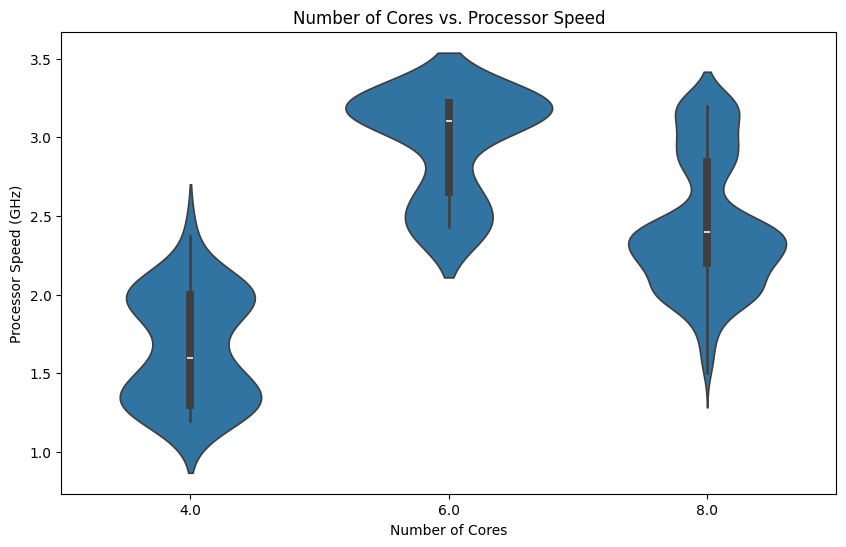

In [48]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='num_cores', y='processor_speed', data=df)
plt.title('Number of Cores vs. Processor Speed')
plt.xlabel('Number of Cores')
plt.ylabel('Processor Speed (GHz)')
plt.show()

In [49]:
df['processor_brand'].value_counts()

processor_brand
snapdragon    428
helio         199
dimensity     176
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           5
spreadtrum      3
sc9863a         2
fusion          1
mediatek        1
Name: count, dtype: int64

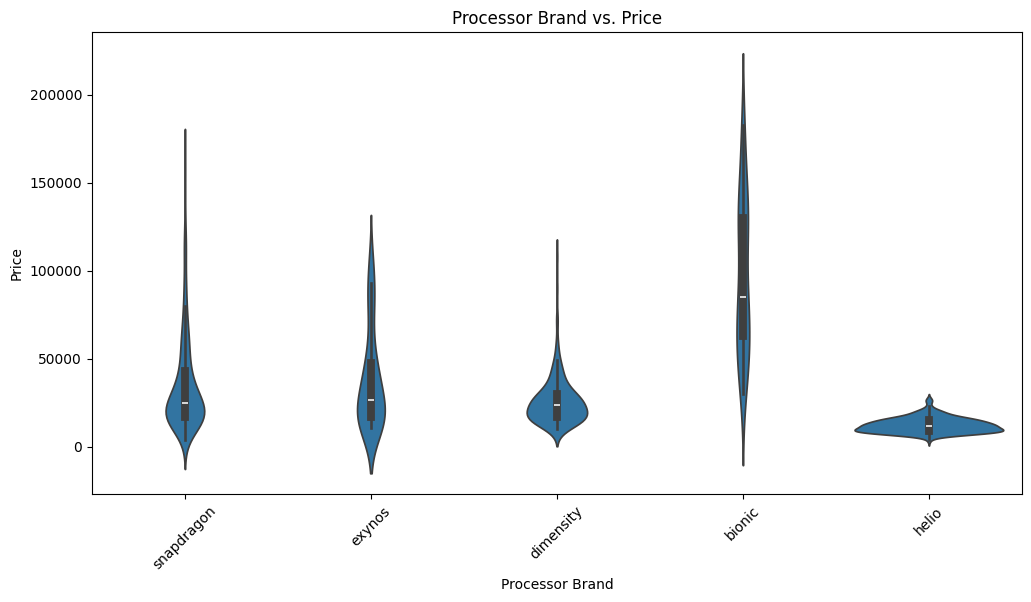

In [50]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='processor_brand', y='price', data=df[df['processor_brand'].isin(['snapdragon', 'helio', 'dimensity', 'exynos', 'bionic'])])
plt.title('Processor Brand vs. Price')
plt.xlabel('Processor Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

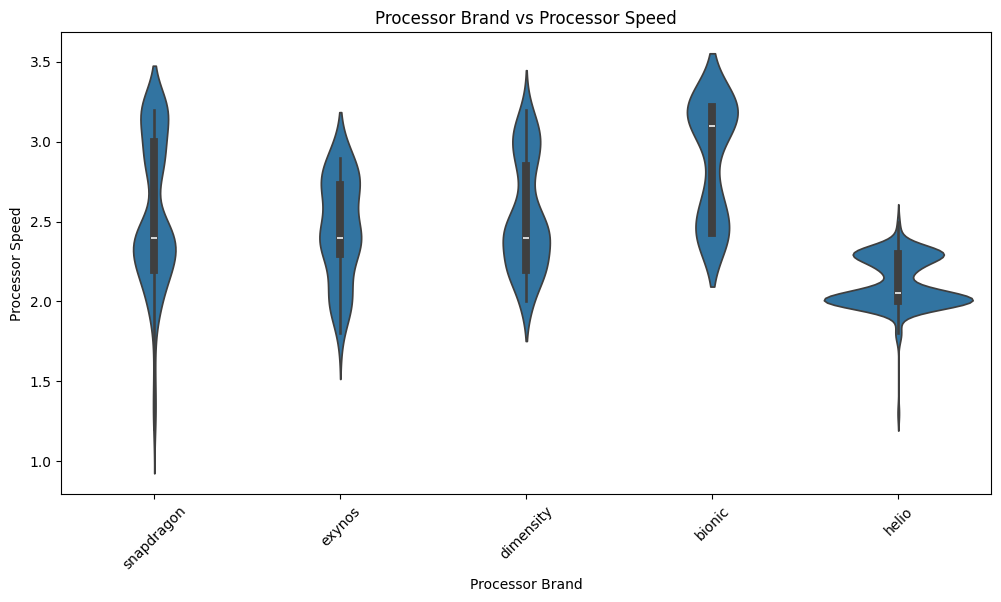

In [51]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='processor_brand',y='processor_speed',data=df[df['processor_brand'].isin(['snapdragon', 'helio', 'dimensity', 'exynos', 'bionic'])])
plt.xticks(rotation=45)
plt.title('Processor Brand vs Processor Speed')
plt.xlabel('Processor Brand')
plt.ylabel('Processor Speed')
plt.show()

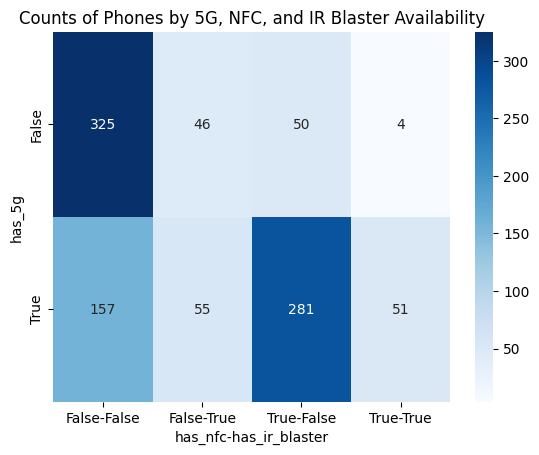

In [52]:
heatmap_data = pd.crosstab(index=df['has_5g'], columns=[df['has_nfc'], df['has_ir_blaster']])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Counts of Phones by 5G, NFC, and IR Blaster Availability')
plt.show()

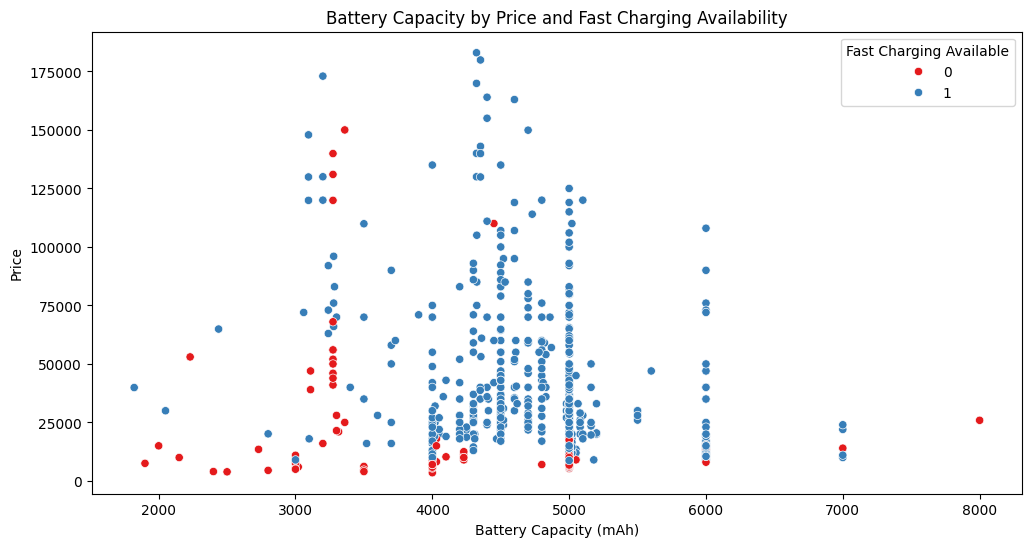

In [53]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='battery_capacity', y='price', hue='fast_charging_available', data=df, palette='Set1')
plt.title('Battery Capacity by Price and Fast Charging Availability')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Price')
plt.legend(title='Fast Charging Available')
plt.show()

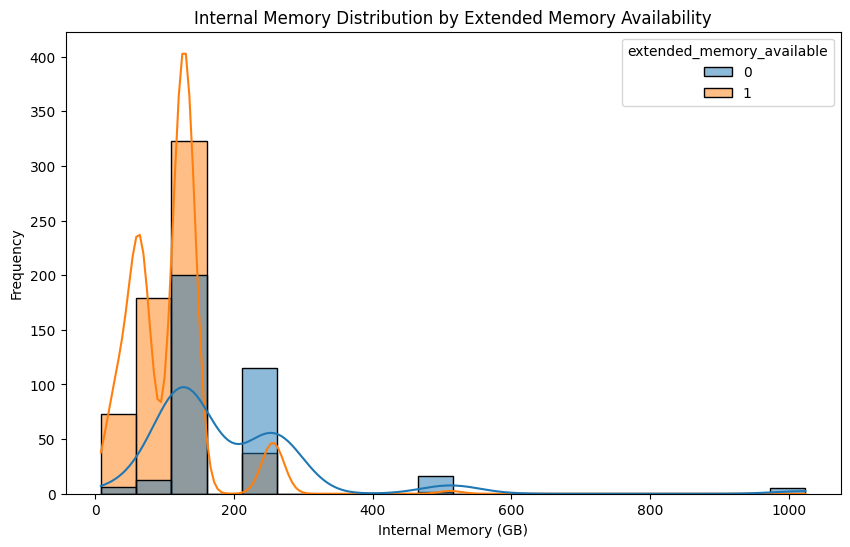

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='internal_memory', hue='extended_memory_available', bins=20, kde=True)
plt.title('Internal Memory Distribution by Extended Memory Availability')
plt.xlabel('Internal Memory (GB)')
plt.ylabel('Frequency')
plt.show()

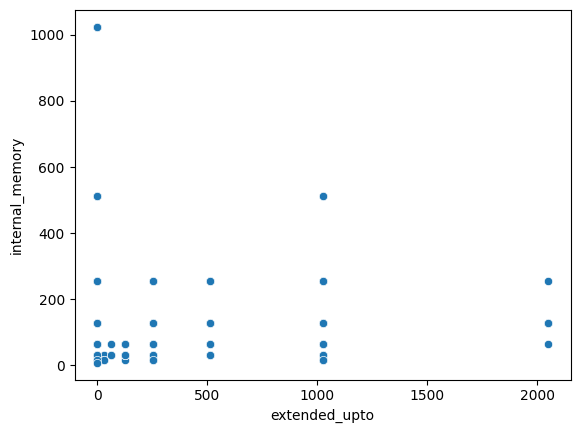

In [55]:
sns.scatterplot(x='extended_upto', y='internal_memory', data=df)
plt.show()

## Encoding

In [56]:
df.drop(columns=['resolution_height', 'resolution_width','model'], inplace=True)

In [57]:
col_to_encode=df.select_dtypes(include='object').columns
print(col_to_encode)

Index(['brand_name', 'processor_brand', 'os'], dtype='object')


In [58]:
le=LabelEncoder()
for i in col_to_encode:
    df[i]=le.fit_transform(df[i])

## Basic Model Building

In [59]:
x=df.drop(columns='price')
y=df['price']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
lr.score(x_test,y_test)

0.7369971521706004

In [63]:
scores=cross_val_score(estimator= lr,X=x,y=y,cv=KFold(5))
print(scores.mean())

0.7312668508938047


In [65]:
df.shape

(969, 24)

## Using SelectKBest

In [78]:
col=x.shape[1]

In [85]:
rf=RandomForestRegressor()
lr=LinearRegression()
dt=DecisionTreeRegressor()
scores_dic={}
for i in range(1,col):
    kbest=SelectKBest(chi2,k=i)
    x_selected=kbest.fit_transform(x,y)
    scores = cross_val_score(estimator= dt,X=x_selected,y=y,cv=KFold(5))
    scores_dic[i]=scores.mean()

In [81]:
top_3_scores = dict(sorted(scores_dic.items(), key=lambda item: item[1], reverse=True)[:3])

print("Top 3 accuracy scores:")
for k, v in top_3_scores.items():
    print(f"Number of features: {k}, Accuracy: {v}")
#RandomForest

Top 3 accuracy scores:
Number of features: 22, Accuracy: 0.889022323823282
Number of features: 20, Accuracy: 0.8883109744240777
Number of features: 21, Accuracy: 0.8875825262034756


In [83]:
top_3_scores = dict(sorted(scores_dic.items(), key=lambda item: item[1], reverse=True)[:3])

print("Top 3 accuracy scores:")
for k, v in top_3_scores.items():
    print(f"Number of features: {k}, Accuracy: {v}")
#LinearRegression

Top 3 accuracy scores:
Number of features: 21, Accuracy: 0.717151164751205
Number of features: 22, Accuracy: 0.7164298630677368
Number of features: 20, Accuracy: 0.7107330808430302


In [86]:
top_3_scores = dict(sorted(scores_dic.items(), key=lambda item: item[1], reverse=True)[:3])

print("Top 3 accuracy scores:")
for k, v in top_3_scores.items():
    print(f"Number of features: {k}, Accuracy: {v}")
#DecisionTreeRegressor

Top 3 accuracy scores:
Number of features: 22, Accuracy: 0.8084816517518798
Number of features: 19, Accuracy: 0.8039362891243382
Number of features: 21, Accuracy: 0.790518653967601


#### Selecting number of features as 22

In [79]:
kbest=SelectKBest(chi2,k=22)
kbest.fit_transform(x,y)

array([[2.90000e+01, 8.90000e+01, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 4.63104e+06],
       [2.90000e+01, 8.10000e+01, 1.00000e+00, ..., 1.00000e+00,
        1.02400e+03, 2.60496e+06],
       [3.60000e+01, 7.50000e+01, 1.00000e+00, ..., 1.00000e+00,
        1.02400e+03, 2.60064e+06],
       ...,
       [3.20000e+01, 8.50000e+01, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.65680e+06],
       [2.50000e+01, 8.00000e+01, 1.00000e+00, ..., 1.00000e+00,
        1.02400e+03, 2.59200e+06],
       [3.60000e+01, 7.40000e+01, 1.00000e+00, ..., 1.00000e+00,
        1.02400e+03, 2.59200e+06]])

In [80]:
kbest.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [81]:
x_best_cols=x.columns[kbest.get_support()]
print(x_best_cols)

Index(['brand_name', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'refresh_rate', 'num_rear_cameras',
       'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution'],
      dtype='object')


In [82]:
x=df[x_best_cols]

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Model Building

In [109]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),SVR(),Ridge(),Lasso(),XGBRegressor(),AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5),n_estimators=50)]

In [110]:
for i in models:
    score=cross_val_score(estimator=i,X=x,y=y,cv=KFold(5),n_jobs=-1)
    y_pred = cross_val_predict(estimator=i, X=x, y=y, cv=KFold(5), n_jobs=-1)
    print(i)
    print()
    print('R² Score: ', score.mean())
    print()
    print('Mean Absolute Error :', mean_absolute_error(y,y_pred))
    print()
    print('Mean Squared Error :', mean_squared_error(y, y_pred))
    print()
    print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y, y_pred)))
    print('_ _ _ '*15)

LinearRegression()

R² Score:  0.7286070141864773

Mean Absolute Error : 10272.759963255405

Mean Squared Error : 220078566.44140643

Root Mean Squared Error : 14835.04521197716
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
DecisionTreeRegressor()

R² Score:  0.8153234471750125

Mean Absolute Error : 7110.485552115583

Mean Squared Error : 163993132.87229103

Root Mean Squared Error : 12805.98035576703
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
RandomForestRegressor()

R² Score:  0.8937612204695246

Mean Absolute Error : 5293.740574254263

Mean Squared Error : 87101252.51561868

Root Mean Squared Error : 9332.805179345527
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
SVR()

R² Score:  -0.13655524400478697

Mean Absolute Error : 17693.68022937728

Mean Squared Error : 954942131.7386307

Root Mean Squared Error : 30902.137980059415
_ _ _ _ _ _ _ _ _ _ 

In [186]:
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'random_state': [42]
}

In [187]:
rfrscv= RandomizedSearchCV(estimator=rf,param_distributions=param_dist_rf,n_iter=100,cv=KFold(5),verbose=2,n_jobs=-1)

In [188]:
rfrscv.fit(x,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'random_state': [42]},
                   verbose=2)

In [189]:
print("Best Hyperparameters:", rfrscv.best_params_)

Best Hyperparameters: {'random_state': 42, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}


In [190]:
print("Best R² Score:", rfrscv.best_score_)

Best R² Score: 0.9143288480792883


In [191]:
best_rf = rfrscv.best_estimator_

In [140]:
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential'],
}

In [135]:
adagscv1 = GridSearchCV(estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5)),param_grid=param_grid_ab,cv=5,verbose=2,n_jobs=-1)

In [136]:
adagscv1.fit(x,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [138]:
print("Best Hyperparameters:", adagscv1.best_params_)

Best Hyperparameters: {'learning_rate': 1.0, 'loss': 'square', 'n_estimators': 100}


In [139]:
print("Best R² Score:", adagscv1.best_score_)

Best R² Score: 0.8879230689334751


In [180]:
best_ada=adagscv1.best_estimator_

In [152]:
param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False], 
    'positive':[True,False]
}

In [153]:
lrgscv = GridSearchCV(estimator=LinearRegression(),param_grid=param_grid_lr,cv=5,verbose=2,n_jobs=-1)

In [154]:
lrgscv.fit(x,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             verbose=2)

In [155]:
print("Best R² Score:", lrgscv.best_score_)

Best R² Score: 0.72996554370548


In [178]:
best_lr=lrgscv.best_estimator_

In [156]:
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
    'criterion': ['squared_error', 'absolute_error'],
}

In [159]:
dtgscv= GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param_grid_dt,cv=5,verbose=2,n_jobs=-1)

In [160]:
dtgscv.fit(x,y)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             verbose=2)

In [162]:
print("Best R² Score:", dtgscv.best_score_)

Best R² Score: 0.840994813411775


In [177]:
best_dt=dtgscv.best_estimator_

In [169]:
param_dist_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.1, 1.0, 10.0],
}

In [170]:
xgrscv = RandomizedSearchCV(estimator=XGBRegressor(), param_distributions=param_dist_xgb,n_iter=1000,cv=KFold(5),verbose=2,n_jobs=-1)

In [171]:
xgrscv.fit(x,y)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0.1, 1.0, 10.0],
                                        'subsample': [0.7, 0.8, 1.0]},
                   verbose=2)

In [172]:
print("Best R² Score:", xgrscv.best_score_)

Best R² Score: 0.9157877922058105


In [173]:
best_xgb=xgrscv.best_estimator_

In [209]:
voting_regressor = VotingRegressor(
    estimators=[
        ('xgb', best_xgb),
#         ('dt', best_dt),
#         ('lr', best_lr),
#         ('ada', best_ada),
        ('rf', best_rf)
    ]
)

In [201]:
y_pred_voting = cross_val_predict(estimator=voting_regressor, X=x, y=y, cv=KFold(5),n_jobs=-1)
score_voting = cross_val_score(estimator=voting_regressor, X=x, y=y, cv=KFold(5),n_jobs=-1)
print('R² Score: ', score_voting.mean())
print()
print('Mean Absolute Error :', mean_absolute_error(y,y_pred_voting))
print()
print('Mean Squared Error :', mean_squared_error(y,y_pred_voting))
print()
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y,y_pred_voting)))

R² Score:  0.9204872944451881

Mean Absolute Error : 4623.7508905810555

Mean Squared Error : 69550523.65093428

Root Mean Squared Error : 8339.695656972997


## 

By applying a Voting Regressor using the best-performing XGBoost and RandomForest models, the model achieved a cross-validated R² score of 92%, indicating a strong predictive accuracy.

The model’s performance metrics are as follows:

- Mean Absolute Error (MAE): 4,623.75
- Mean Squared Error (MSE): 69,550,523.65
- Root Mean Squared Error (RMSE): 8,339.70
